# 6.8630 Final Project

In [1685]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

from tools import PcfgGrammar, PcfgGenerator, flatten_tree
from tools.grammar import DynamicGrammar
from nltk import Nonterminal
from nltk.grammar import ProbabilisticProduction


In [1686]:
s1_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/S1.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
#s2_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/S2.gr', './main-data/grammar/S2_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')

#merged_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/S1.gr','./main-data/grammar/S1_Vocab.gr','./main-data/grammar/S2.gr','./main-data/grammar/S2_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')

merged_grammar = s1_grammar

### Helper Functions

In [1687]:
def parse_sentence(grammar, sentence, verbose=False):
    """
        returns the most probable parse
        verbose=True prints errors if cannot parse a sentence
    """
    tokens = sentence.split()
    try:
        tree = grammar.get_most_probable_parse(tokens)
        if (tree is None) and verbose:
            print(f'no parse tree found for `{sentence}`')
        return tree
    except ValueError as e:
        if verbose:
            print(f'cannot parse `{sentence}`')
            print(e)
        return None


def parse_many_sentences(grammar, sentences, verbose=False):
    """
        returns the most probable parse for a list of sentences
        verbose=True prints errors if cannot parse a sentence
    """
    parse_trees = []
    for line in sentences:
        parse_trees.append(parse_sentence(grammar, line, verbose))
    return parse_trees


def read_file_lines(text_file):
    """
        reads the text_file
        returns a list of uncommented lines
    """
    lines = []
    with open(text_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('#'):
                continue  # comment
            lines.append(line)
    return lines


def parse_file(grammar, text_file, verbose=False):
    """
        returns the most probable parse for sentences in the file
        verbose=True prints errors if cannot parse a sentence
    """
    sentences = read_file_lines(text_file)
    return parse_many_sentences(grammar, sentences, verbose)


def cross_entropy_file(grammar, text_file, verbose=False):
    """
        returns the cross_entropy score of parse for sentences in the file
        verbose=True prints errors if cannot parse a sentence
    """
    return grammar.get_cross_entropy_over_sentences(read_file_lines(text_file), verbose)

def generate_random_sentences(grammar, num_sentences=5, random_seed=0):
    gen = PcfgGenerator(grammar=grammar, random_seed=random_seed)
    sample_parsed_trees = [gen.generate() for _ in range(num_sentences)]
    sample_sentences = [" ".join(flatten_tree(tree)) for tree in sample_parsed_trees]
    return sample_sentences

def combine_grammars(s1_grammar, s2_grammar, prob_start_to_s1=0.99):
    dynamic_merged = DynamicGrammar(s1_grammar.productions() + s2_grammar.productions())
    dynamic_merged.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S1"),), weight=prob_start_to_s1)
    dynamic_merged.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S2"),), weight=1-prob_start_to_s1)
    merged_grammar = dynamic_merged.get_pcfg_grammar()
    return merged_grammar

def export_grammars(s1_grammar, s2_grammar, prob_start_to_s1=0.99):
    ds1 = DynamicGrammar(s1_grammar.productions())
    ds1.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S1"),), weight=prob_start_to_s1)

    ds2 = DynamicGrammar(s2_grammar.productions())
    ds2.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S2"),), weight=1-prob_start_to_s1)

    ds1.export_to_file(vocab_filepath='new_S1_Vocab.gr', rules_filepath='new_S1.gr')
    ds2.export_to_file(vocab_filepath='new_S2_Vocab.gr', rules_filepath='new_S2.gr')

#### Gustavo's songs:

Come hang out (parsed)

Drama (parsed)

I'm not famous (parsed)

In [1688]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/come-hang-out.sen', verbose=True)

In [1689]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/drama.sen', verbose=True)

In [1690]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/im-not-famous.sen', verbose=True)

#### Mckinley's Songs:

In [1691]:
#parsed_trees = parse_file(s1_grammar, './main-data/songs/.sen', verbose=True)

In [1692]:
#generate_random_sentences(merged_grammar, num_sentences=10)

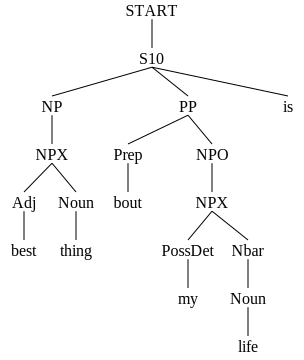

In [1693]:
parse_sentence(merged_grammar, "best thing bout my life is", verbose = True)